# Social Network Analysis - Amber Heard Case - Twitter
## Preparing Data Set

In [1]:
import pandas as pd
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import warnings
import re
import seaborn as sb
import re

warnings.filterwarnings("ignore")

import plotly.io as pio
from helpers import *

pio.renderers
# pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 950
svg_renderer.height = 550

%matplotlib inline
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import ast
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Leap\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Load Twitter Data

In [2]:
data_path = "../../twitter_data/"

In [3]:
data_2022 = [_ for _ in os.listdir(data_path) if "2022" in _]

In [4]:
data_2022

['2017-2022 Twitter all_quotes retweets Amber Heard Timeline_Data.csv',
 '2022 Tweets_Metrics.csv',
 '2022 Twitter Accounts Jan-April_Amber Heard Data.csv',
 '2022 Twitter daily_creation Jan-April_Amber Heard Data.csv',
 '2022 Twitter Tweets Jan-April_Amber Heard Data.csv',
 '2022 Twitter Tweets_lite Jan-April_Amber Heard Data.csv',
 '2022 Twitter users_created_in_2022_Jan-April_Amber Heard Data.csv',
 'Twitter 2017-2022 all_comments on Amber Heard Profile.csv',
 'Twitter 2017-2022 all_comments on Amber Heard Profile.json',
 'Twitter comments_2022 on Profile Amber Heard.csv']

In [5]:
df_2022_tweets_metrics = pd.read_csv(data_path + "2022 Tweets_Metrics.csv")

In [6]:
data_investigation(df_2022_tweets_metrics)

Data Head


,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,created_at,text,author.id,author.username
0,1477504983130116096,1,0,2.0,0.0,2022-01-02T05:00:13.000Z,@la77465262 @Melinda15199317 @Dior So why is #...,1.149795e+08,seano999
1,1477503751716065280,0,0,2.0,0.0,2022-01-02T04:55:19.000Z,Only thing I want them to leave alone is the f...,1.426227e+18,WonderWilson18


______________________________________________________________________________

Data Shape


'The data has 506657 rows and 9 columns'

______________________________________________________________________________

Columns


['id',
 'public_metrics.retweet_count',
 'public_metrics.reply_count',
 'public_metrics.like_count',
 'public_metrics.quote_count',
 'created_at',
 'text',
 'author.id',
 'author.username']

______________________________________________________________________________

Columns Must be Dropped (ALL NULLS)


None

______________________________________________________________________________

Columns Must be Dropped (HAS ONLY ONE UNIQUE VALUE)


None

______________________________________________________________________________

Column Data Type


id                                int
public_metrics.retweet_count      int
public_metrics.reply_count        int
public_metrics.like_count       float
public_metrics.quote_count      float
created_at                        str
text                              str
author.id                       float
author.username                   str
dtype: object

______________________________________________________________________________

Number of Nulls in Each Column


author.id                       23158
author.username                 23158
public_metrics.like_count           1
public_metrics.quote_count          1
created_at                          1
text                                1
id                                  0
public_metrics.retweet_count        0
public_metrics.reply_count          0
dtype: int64

______________________________________________________________________________

Percentge of Nulls in Each Column


author.id                       0.045707
author.username                 0.045707
public_metrics.like_count       0.000002
public_metrics.quote_count      0.000002
created_at                      0.000002
text                            0.000002
id                              0.000000
public_metrics.retweet_count    0.000000
public_metrics.reply_count      0.000000
dtype: float64

______________________________________________________________________________

Numeric Columns' Staticts


,public_metrics.retweet_count,public_metrics.like_count,public_metrics.quote_count,author.id
count,5.066570e+05,506656.000000,506656.000000,4.834990e+05
mean,4.798429e+01,47.225176,0.727719,7.389797e+17
std,2.976961e+04,2247.787727,36.033358,6.282754e+17
min,0.000000e+00,0.000000,0.000000,1.968000e+03
25%,0.000000e+00,0.000000,0.000000,7.318198e+08
50%,0.000000e+00,1.000000,0.000000,9.423402e+17
75%,0.000000e+00,5.000000,0.000000,1.329510e+18
max,2.118879e+07,666427.000000,18855.000000,1.519822e+18


______________________________________________________________________________



In [7]:
pd.to_datetime(df_2022_tweets_metrics.created_at).min()

Timestamp('2022-01-01 00:00:49+0000', tz='UTC')

In [8]:
pd.to_datetime(df_2022_tweets_metrics.created_at).max()

Timestamp('2022-04-28 23:59:59+0000', tz='UTC')

In [9]:
df_2022_tweets = pd.read_csv(data_path + "2022 Twitter Tweets Jan-April_Amber Heard Data.csv")

In [10]:
data_investigation(df_2022_tweets)

Data Head


,id_str,created_at,full_text,lang,in_reply_to_status_id_str,in_reply_to_user_id,entities.hashtags,entities.media,entities.symbols,entities.urls,...,user.friends_count,user.lang,user.location,user.name,user.screen_name,user.profile_banner_url,user.profile_image_url,user.statuses_count,user.url,user.verified
0,1477504983130116096.0,2022-01-02 05:00:13+00:00,@la77465262 @Melinda15199317 @Dior So why is #...,en,1466075642244603909,1363630915298148352.0,"[{'indices': [45, 56], 'text': 'JohnnyDepp'}]","[{'original_info': {'width': 1058, 'focus_rect...",[],[],...,1898.0,NaN,NaN,Sean O'Connor,seano999,https://pbs.twimg.com/profile_banners/11497951...,http://pbs.twimg.com/profile_images/1442389537...,27033.0,NaN,False
1,1477503751716065280.0,2022-01-02 04:55:19+00:00,Only thing I want them to leave alone is the f...,en,NaN,NaN,[],NaN,[],[],...,1025.0,NaN,NaN,❤️‍🔥 Wilson the Opp Slayer 🔪,WonderWilson18,https://pbs.twimg.com/profile_banners/14262271...,http://pbs.twimg.com/profile_images/1515742990...,27853.0,https://t.co/dVvgQNht1k,False


______________________________________________________________________________

Data Shape


'The data has 508247 rows and 39 columns'

______________________________________________________________________________

Columns


['id_str',
 'created_at',
 'full_text',
 'lang',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'entities.hashtags',
 'entities.media',
 'entities.symbols',
 'entities.urls',
 'entities.user_mentions',
 'source',
 'quoted_status.id_str',
 'quoted_status.created_at',
 'quoted_status.full_text',
 'quoted_status.lang',
 'quoted_status.in_reply_to_status_id_str',
 'quoted_status.in_reply_to_user_id',
 'quoted_status.entities.hashtags',
 'quoted_status.entities.media',
 'quoted_status.entities.symbols',
 'quoted_status.entities.urls',
 'quoted_status.entities.user_mentions',
 'quoted_status.user.id_str',
 'quoted_status.source',
 'user.id_str',
 'user.created_at',
 'user.description',
 'user.followers_count',
 'user.friends_count',
 'user.lang',
 'user.location',
 'user.name',
 'user.screen_name',
 'user.profile_banner_url',
 'user.profile_image_url',
 'user.statuses_count',
 'user.url',
 'user.verified']

______________________________________________________________________________

Columns Must be Dropped (ALL NULLS)


None

______________________________________________________________________________

Columns Must be Dropped (HAS ONLY ONE UNIQUE VALUE)


None

______________________________________________________________________________

Column Data Type


id_str                                             float
created_at                                           str
full_text                                            str
lang                                                 str
in_reply_to_status_id_str                            str
in_reply_to_user_id                                float
entities.hashtags                                    str
entities.media                                       str
entities.symbols                                     str
entities.urls                                        str
entities.user_mentions                               str
source                                               str
quoted_status.id_str                       numpy.float64
quoted_status.created_at                             str
quoted_status.full_text                              str
quoted_status.lang                                   str
quoted_status.in_reply_to_status_id_str    numpy.float64
quoted_status.in_reply_to_user_

______________________________________________________________________________

Number of Nulls in Each Column


user.lang                                  508246
quoted_status.in_reply_to_status_id_str    496727
quoted_status.in_reply_to_user_id          496434
quoted_status.entities.media               446443
entities.media                             424657
quoted_status.id_str                       405286
quoted_status.entities.urls                405286
quoted_status.entities.symbols             405286
quoted_status.entities.hashtags            405286
quoted_status.lang                         405286
quoted_status.full_text                    405286
quoted_status.created_at                   405286
quoted_status.entities.user_mentions       405286
quoted_status.user.id_str                  405285
quoted_status.source                       405285
in_reply_to_status_id_str                  401322
in_reply_to_user_id                        396139
user.url                                   364462
user.location                              191357
user.profile_banner_url                     77286


______________________________________________________________________________

Percentge of Nulls in Each Column


user.lang                                  0.999998
quoted_status.in_reply_to_status_id_str    0.977334
quoted_status.in_reply_to_user_id          0.976757
quoted_status.entities.media               0.878398
entities.media                             0.835533
quoted_status.id_str                       0.797419
quoted_status.entities.urls                0.797419
quoted_status.entities.symbols             0.797419
quoted_status.entities.hashtags            0.797419
quoted_status.lang                         0.797419
quoted_status.full_text                    0.797419
quoted_status.created_at                   0.797419
quoted_status.entities.user_mentions       0.797419
quoted_status.user.id_str                  0.797417
quoted_status.source                       0.797417
in_reply_to_status_id_str                  0.789620
in_reply_to_user_id                        0.779422
user.url                                   0.717096
user.location                              0.376504
user.profile

______________________________________________________________________________

Numeric Columns' Staticts


,quoted_status.id_str,quoted_status.in_reply_to_status_id_str,quoted_status.in_reply_to_user_id,quoted_status.user.id_str,user.followers_count
count,1.029610e+05,1.152000e+04,1.181300e+04,1.029620e+05,4.972860e+05
mean,1.507548e+18,1.501059e+18,6.471270e+17,6.894290e+17,3.561291e+04
std,3.866223e+16,5.041176e+16,6.153455e+17,5.991121e+17,5.992073e+05
min,2.891693e+10,7.364039e+17,1.200000e+01,1.200000e+01,0.000000e+00
25%,1.510420e+18,1.499167e+18,2.675684e+08,7.101272e+08,6.400000e+01
50%,1.516054e+18,1.514433e+18,8.066152e+17,8.500210e+17,2.780000e+02
75%,1.517476e+18,1.517252e+18,1.273406e+18,1.277755e+18,1.014000e+03
max,1.519827e+18,1.519822e+18,1.519358e+18,1.519427e+18,5.790364e+07


______________________________________________________________________________



In [11]:
df_2022_tweets_lite = pd.read_csv(data_path + "2022 Twitter Tweets_lite Jan-April_Amber Heard Data.csv")

In [12]:
data_investigation(df_2022_tweets_lite)

Data Head


,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count
0,1477504983130116096,2022-01-02 05:00:13+00:00,@la77465262 @Melinda15199317 @Dior So why is #...,114979514,seano999,Sean O'Connor,2010-02-17 06:20:14+00:00,"Young guy, varied interests. Socialist. Europe...",http://pbs.twimg.com/profile_images/1442389537...,https://pbs.twimg.com/profile_banners/11497951...,NaN,27033.0,631.0,1898.0
1,1477503751716065280,2022-01-02 04:55:19+00:00,Only thing I want them to leave alone is the f...,1426227152589139969,WonderWilson18,❤️‍🔥 Wilson the Opp Slayer 🔪,2021-08-13 17:00:36+00:00,"So fuck your rules man 🖕🏽Your Favorite K2, Avr...",http://pbs.twimg.com/profile_images/1515742990...,https://pbs.twimg.com/profile_banners/14262271...,https://t.co/dVvgQNht1k,27853.0,869.0,1025.0


______________________________________________________________________________

Data Shape


'The data has 573783 rows and 14 columns'

______________________________________________________________________________

Columns


['id_str',
 'created_at',
 'full_text',
 'user.id_str',
 'user.screen_name',
 'user.name',
 'user.created_at',
 'user.description',
 'user.profile_image_url',
 'user.profile_banner_url',
 'user.url',
 'user.statuses_count',
 'user.followers_count',
 'user.friends_count']

______________________________________________________________________________

Columns Must be Dropped (ALL NULLS)


None

______________________________________________________________________________

Columns Must be Dropped (HAS ONLY ONE UNIQUE VALUE)


None

______________________________________________________________________________

Column Data Type


id_str                       int
created_at                   str
full_text                    str
user.id_str                  int
user.screen_name             str
user.name                    str
user.created_at              str
user.description             str
user.profile_image_url       str
user.profile_banner_url      str
user.url                     str
user.statuses_count        float
user.followers_count       float
user.friends_count         float
dtype: object

______________________________________________________________________________

Number of Nulls in Each Column


user.url                   429997
user.profile_banner_url    142821
user.description           113418
user.profile_image_url      76504
user.followers_count        76497
user.friends_count          76497
user.statuses_count         76496
user.name                   51543
user.id_str                 51529
user.screen_name            51528
user.created_at             51528
created_at                      2
full_text                       2
id_str                          0
dtype: int64

______________________________________________________________________________

Percentge of Nulls in Each Column


user.url                   0.749407
user.profile_banner_url    0.248911
user.description           0.197667
user.profile_image_url     0.133333
user.followers_count       0.133320
user.friends_count         0.133320
user.statuses_count        0.133319
user.name                  0.089830
user.id_str                0.089806
user.screen_name           0.089804
user.created_at            0.089804
created_at                 0.000003
full_text                  0.000003
id_str                     0.000000
dtype: float64

______________________________________________________________________________

Numeric Columns' Staticts


,user.statuses_count,user.followers_count,user.friends_count
count,4.972870e+05,4.972860e+05,497286.000000
mean,4.413370e+04,3.561291e+04,1049.867963
std,2.589282e+05,5.992073e+05,7254.790662
min,1.000000e+00,0.000000e+00,0.000000
25%,1.814000e+03,6.400000e+01,116.000000
50%,7.658000e+03,2.780000e+02,348.000000
75%,2.832700e+04,1.014000e+03,858.000000
max,7.780807e+06,5.790364e+07,658941.000000


______________________________________________________________________________



In [13]:
df_2022_tweets_lite[df_2022_tweets_lite["created_at"].str.contains("00:00") == False]

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count
196608,❒ In ℒℴѵℯ with food,http://pbs.twimg.com/profile_images/1508153755...,https://pbs.twimg.com/profile_banners/23105735...,NaN,7295,218,1610,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349022,#TeamBritney #BritneyFam!! ♥,http://pbs.twimg.com/profile_images/1196906167...,https://pbs.twimg.com/profile_banners/23809249...,https://t.co/FposlCsqAr,26269,2494,1821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
524288,- https://t.co/AEJbkOuVQ2,21188789,Nyzms,Nizam,2009-02-18 11:51:35+00:00,"Even a boring person needs a Twitter account, ...",http://pbs.twimg.com/profile_images/1140315101...,NaN,NaN,77704,560,239.0,NaN,NaN


In [14]:
df_2022_tweets_lite = df_2022_tweets_lite.drop(
    list(
        df_2022_tweets_lite[
            df_2022_tweets_lite["created_at"].str.contains("00:00") == False
        ].index
    ),
    axis=0,
)

In [15]:
df_2022_tweets_lite["created_at"] = pd.to_datetime(df_2022_tweets_lite["created_at"])

In [16]:
df_2022_tweets_lite["user.created_at"] = pd.to_datetime(df_2022_tweets_lite["user.created_at"])

In [17]:
df_2022_tweets_lite

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count
0,1477504983130116096,2022-01-02 05:00:13+00:00,@la77465262 @Melinda15199317 @Dior So why is #...,114979514,seano999,Sean O'Connor,2010-02-17 06:20:14+00:00,"Young guy, varied interests. Socialist. Europe...",http://pbs.twimg.com/profile_images/1442389537...,https://pbs.twimg.com/profile_banners/11497951...,NaN,27033.0,631.0,1898.0
1,1477503751716065280,2022-01-02 04:55:19+00:00,Only thing I want them to leave alone is the f...,1426227152589139969,WonderWilson18,❤️‍🔥 Wilson the Opp Slayer 🔪,2021-08-13 17:00:36+00:00,"So fuck your rules man 🖕🏽Your Favorite K2, Avr...",http://pbs.twimg.com/profile_images/1515742990...,https://pbs.twimg.com/profile_banners/14262271...,https://t.co/dVvgQNht1k,27853.0,869.0,1025.0
2,1477499814719983617,2022-01-02 04:39:41+00:00,@soldierboy43001 @ZakReckless Yeah but Snyder ...,1427358993803005956,StevenJCurry,Steven Curry,2021-08-16 19:58:03+00:00,NaN,http://pbs.twimg.com/profile_images/1429534379...,https://pbs.twimg.com/profile_banners/14273589...,NaN,199.0,15.0,139.0
3,1477497740498292738,2022-01-02 04:31:26+00:00,@IIMissMax @bg98021 @GerberKawasaki You forgot...,1354476984617885703,Vincent72516869,Vincent 1,2021-01-27 17:11:08+00:00,🌮🍕🍔🥪🍳🍤🍜🍛🥟🍰💵,http://pbs.twimg.com/profile_images/1354614785...,NaN,NaN,2313.0,26.0,128.0
4,1477496477484212225,2022-01-02 04:26:25+00:00,I never seen Aquaman nor will I because Amber ...,1076943230657269761,YoonJaysSimp,𝐇𝐘𝐃𝐄,2018-12-23 20:50:49+00:00,𝐁𝐋 𝐂𝐎𝐍𝐓𝐄𝐍𝐓 • 𝘈𝘯𝘪𝘮𝘦 • 𝘔𝘢𝘯𝘨𝘢 • 𝘔𝘢𝘯𝘩𝘸𝘢 • 𝘕𝘚𝘍𝘞 • 𝘚...,http://pbs.twimg.com/profile_images/1516751870...,https://pbs.twimg.com/profile_banners/10769432...,https://t.co/XkBVR5FDCS,5423.0,120.0,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573778,1515569901158600704,2022-04-17 05:56:37+00:00,Gender card pulled out. They are now spinning ...,27013539,GhelSandra,ayyy nakoooo,2009-03-27 14:25:52+00:00,🐯 tomasino est 2000something art educator.pers...,http://pbs.twimg.com/profile_images/1402120521...,https://pbs.twimg.com/profile_banners/27013539...,https://t.co/KRDaAomcsU,30280.0,160.0,201.0
573779,1515569890391961601,2022-04-17 05:56:34+00:00,Amber heard is a libra moon. Ive known a few l...,1418420215755517952,lilithrising_,Jeli Bean,2021-07-23 03:59:18+00:00,☀️♌ 🌚♑ ♄,http://pbs.twimg.com/profile_images/1516523367...,https://pbs.twimg.com/profile_banners/14184202...,NaN,7863.0,59.0,154.0
573780,1515569612686970883,2022-04-17 05:55:28+00:00,#JusticeForJohnnyDepp \n#JusticeForJohnnyDeppV...,3303069384,CJMoss007,Cindy Moss🌱Ⓥ,2015-08-01 07:03:17+00:00,#JusticeForJohnnyDepp,http://pbs.twimg.com/profile_images/1502775880...,NaN,NaN,6225.0,144.0,647.0
573781,1515569604818575368,2022-04-17 05:55:26+00:00,"Amber Heard is dating Eve Fartlow, Chelsea Man...",1319471183016939520,Jankem69420,Jalopy Galopy,2020-10-23 02:50:36+00:00,''Virtue-signalling geopolitically ignorant ca...,http://pbs.twimg.com/profile_images/1427306627...,https://pbs.twimg.com/profile_banners/13194711...,https://t.co/C6Pn7cxcss,9171.0,585.0,3214.0


In [18]:
df_2022_tweets_metrics

,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,created_at,text,author.id,author.username
0,1477504983130116096,1,0,2.0,0.0,2022-01-02T05:00:13.000Z,@la77465262 @Melinda15199317 @Dior So why is #...,1.149795e+08,seano999
1,1477503751716065280,0,0,2.0,0.0,2022-01-02T04:55:19.000Z,Only thing I want them to leave alone is the f...,1.426227e+18,WonderWilson18
2,1477499814719983617,0,0,12.0,0.0,2022-01-02T04:39:41.000Z,@soldierboy43001 @ZakReckless Yeah but Snyder ...,1.427359e+18,StevenJCurry
3,1477497740498292738,0,0,0.0,0.0,2022-01-02T04:31:26.000Z,@IIMissMax @bg98021 @GerberKawasaki You forgot...,1.354477e+18,Vincent72516869
4,1477496477484212225,0,0,1.0,0.0,2022-01-02T04:26:25.000Z,I never seen Aquaman nor will I because Amber ...,1.076943e+18,YoonJaysSimp
...,...,...,...,...,...,...,...,...,...
506652,1515569901158600704,0,0,0.0,0.0,2022-04-17T05:56:37.000Z,Gender card pulled out. They are now spinning ...,2.701354e+07,GhelSandra
506653,1515569890391961601,0,1,0.0,1.0,2022-04-17T05:56:34.000Z,Amber heard is a libra moon. Ive known a few l...,1.418420e+18,lilithrising_
506654,1515569612686970883,1,0,2.0,0.0,2022-04-17T05:55:28.000Z,#JusticeForJohnnyDepp \n#JusticeForJohnnyDeppV...,3.303069e+09,CJMoss007
506655,1515569604818575368,2,0,7.0,0.0,2022-04-17T05:55:26.000Z,"Amber Heard is dating Eve Fartlow, Chelsea Man...",1.319471e+18,Jankem69420


In [19]:
df_2022_tweets_lite["id_str"] = df_2022_tweets_lite.id_str.astype(str)
df_2022_tweets_metrics["id"] = df_2022_tweets_metrics.id.astype(str)

In [20]:
df_2022_tweets_metrics = df_2022_tweets_metrics.iloc[:,:5]

## Clean Text

In [21]:
df_2022_tweets_lite

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count
0,1477504983130116096,2022-01-02 05:00:13+00:00,@la77465262 @Melinda15199317 @Dior So why is #...,114979514,seano999,Sean O'Connor,2010-02-17 06:20:14+00:00,"Young guy, varied interests. Socialist. Europe...",http://pbs.twimg.com/profile_images/1442389537...,https://pbs.twimg.com/profile_banners/11497951...,NaN,27033.0,631.0,1898.0
1,1477503751716065280,2022-01-02 04:55:19+00:00,Only thing I want them to leave alone is the f...,1426227152589139969,WonderWilson18,❤️‍🔥 Wilson the Opp Slayer 🔪,2021-08-13 17:00:36+00:00,"So fuck your rules man 🖕🏽Your Favorite K2, Avr...",http://pbs.twimg.com/profile_images/1515742990...,https://pbs.twimg.com/profile_banners/14262271...,https://t.co/dVvgQNht1k,27853.0,869.0,1025.0
2,1477499814719983617,2022-01-02 04:39:41+00:00,@soldierboy43001 @ZakReckless Yeah but Snyder ...,1427358993803005956,StevenJCurry,Steven Curry,2021-08-16 19:58:03+00:00,NaN,http://pbs.twimg.com/profile_images/1429534379...,https://pbs.twimg.com/profile_banners/14273589...,NaN,199.0,15.0,139.0
3,1477497740498292738,2022-01-02 04:31:26+00:00,@IIMissMax @bg98021 @GerberKawasaki You forgot...,1354476984617885703,Vincent72516869,Vincent 1,2021-01-27 17:11:08+00:00,🌮🍕🍔🥪🍳🍤🍜🍛🥟🍰💵,http://pbs.twimg.com/profile_images/1354614785...,NaN,NaN,2313.0,26.0,128.0
4,1477496477484212225,2022-01-02 04:26:25+00:00,I never seen Aquaman nor will I because Amber ...,1076943230657269761,YoonJaysSimp,𝐇𝐘𝐃𝐄,2018-12-23 20:50:49+00:00,𝐁𝐋 𝐂𝐎𝐍𝐓𝐄𝐍𝐓 • 𝘈𝘯𝘪𝘮𝘦 • 𝘔𝘢𝘯𝘨𝘢 • 𝘔𝘢𝘯𝘩𝘸𝘢 • 𝘕𝘚𝘍𝘞 • 𝘚...,http://pbs.twimg.com/profile_images/1516751870...,https://pbs.twimg.com/profile_banners/10769432...,https://t.co/XkBVR5FDCS,5423.0,120.0,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573778,1515569901158600704,2022-04-17 05:56:37+00:00,Gender card pulled out. They are now spinning ...,27013539,GhelSandra,ayyy nakoooo,2009-03-27 14:25:52+00:00,🐯 tomasino est 2000something art educator.pers...,http://pbs.twimg.com/profile_images/1402120521...,https://pbs.twimg.com/profile_banners/27013539...,https://t.co/KRDaAomcsU,30280.0,160.0,201.0
573779,1515569890391961601,2022-04-17 05:56:34+00:00,Amber heard is a libra moon. Ive known a few l...,1418420215755517952,lilithrising_,Jeli Bean,2021-07-23 03:59:18+00:00,☀️♌ 🌚♑ ♄,http://pbs.twimg.com/profile_images/1516523367...,https://pbs.twimg.com/profile_banners/14184202...,NaN,7863.0,59.0,154.0
573780,1515569612686970883,2022-04-17 05:55:28+00:00,#JusticeForJohnnyDepp \n#JusticeForJohnnyDeppV...,3303069384,CJMoss007,Cindy Moss🌱Ⓥ,2015-08-01 07:03:17+00:00,#JusticeForJohnnyDepp,http://pbs.twimg.com/profile_images/1502775880...,NaN,NaN,6225.0,144.0,647.0
573781,1515569604818575368,2022-04-17 05:55:26+00:00,"Amber Heard is dating Eve Fartlow, Chelsea Man...",1319471183016939520,Jankem69420,Jalopy Galopy,2020-10-23 02:50:36+00:00,''Virtue-signalling geopolitically ignorant ca...,http://pbs.twimg.com/profile_images/1427306627...,https://pbs.twimg.com/profile_banners/13194711...,https://t.co/C6Pn7cxcss,9171.0,585.0,3214.0


### Get Mentions

In [22]:
df_2022_tweets_lite.full_text[0]

"@la77465262 @Melinda15199317 @Dior So why is #JohnnyDepp only bringing a civil case against Amber Heard? Because he knows his evidence won't stand up in criminal court! Johnny's just wasting his money! His reputation is shot. His own fault for bringing the case in UK. Even the stans say it's a waste of time! 😂 https://t.co/JcUseKVN0s"

In [23]:
re.findall(r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9_]+)", df_2022_tweets_lite.full_text[0])

['la77465262', 'Melinda15199317', 'Dior']

In [24]:
df_2022_tweets_lite["mentions"] = df_2022_tweets_lite.full_text.apply(
    lambda x: re.findall(
        r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9_]+)", str(x)
    )
)

In [25]:
df_2022_tweets_lite["n_mentions"] = df_2022_tweets_lite["mentions"].apply(lambda x: len(x))

In [26]:
df_2022_tweets_lite[df_2022_tweets_lite.n_mentions > 0]

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count,mentions,n_mentions
0,1477504983130116096,2022-01-02 05:00:13+00:00,@la77465262 @Melinda15199317 @Dior So why is #...,114979514,seano999,Sean O'Connor,2010-02-17 06:20:14+00:00,"Young guy, varied interests. Socialist. Europe...",http://pbs.twimg.com/profile_images/1442389537...,https://pbs.twimg.com/profile_banners/11497951...,NaN,27033.0,631.0,1898.0,"[la77465262, Melinda15199317, Dior]",3
2,1477499814719983617,2022-01-02 04:39:41+00:00,@soldierboy43001 @ZakReckless Yeah but Snyder ...,1427358993803005956,StevenJCurry,Steven Curry,2021-08-16 19:58:03+00:00,NaN,http://pbs.twimg.com/profile_images/1429534379...,https://pbs.twimg.com/profile_banners/14273589...,NaN,199.0,15.0,139.0,"[soldierboy43001, ZakReckless]",2
3,1477497740498292738,2022-01-02 04:31:26+00:00,@IIMissMax @bg98021 @GerberKawasaki You forgot...,1354476984617885703,Vincent72516869,Vincent 1,2021-01-27 17:11:08+00:00,🌮🍕🍔🥪🍳🍤🍜🍛🥟🍰💵,http://pbs.twimg.com/profile_images/1354614785...,NaN,NaN,2313.0,26.0,128.0,"[IIMissMax, bg98021, GerberKawasaki]",3
6,1477494226451673094,2022-01-02 04:17:28+00:00,@neutral_as_eff @TinseltownMayor @RSTSnyderVer...,2867834002,blackfire1118,The Film Hipster,2014-11-08 19:20:40+00:00,NaN,http://pbs.twimg.com/profile_images/1400018693...,https://pbs.twimg.com/profile_banners/28678340...,NaN,936.0,29.0,352.0,"[neutral_as_eff, TinseltownMayor, RSTSnyderVer...",4
8,1477494112844763141,2022-01-02 04:17:01+00:00,@justiceforjteam @LauraBockov Yes we do!\n#Jus...,106104546,Sunyasue,Ada Lavin,2010-01-18 14:26:24+00:00,Life is good.,http://pbs.twimg.com/profile_images/7605920297...,https://pbs.twimg.com/profile_banners/10610454...,NaN,39737.0,1395.0,2422.0,"[justiceforjteam, LauraBockov]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573765,1515572140896133120,2022-04-17 06:05:31+00:00,"@BriannaClamp You know what, I have to give th...",1380912440548937732,Londyn141,Londyn14,2021-04-10 15:56:12+00:00,NaN,http://pbs.twimg.com/profile_images/1380912650...,NaN,NaN,10.0,0.0,24.0,[BriannaClamp],1
573767,1515571529957974018,2022-04-17 06:03:05+00:00,@ThePerezHilton Yes! She is a self confessed a...,1305149099751231490,KarenRollings3,Karen Rollings,2020-09-13 14:19:48+00:00,"Registered Nurse, working in Post Anaesthetic ...",http://pbs.twimg.com/profile_images/1305151125...,NaN,NaN,1416.0,60.0,92.0,[ThePerezHilton],1
573771,1515570817790189568,2022-04-17 06:00:15+00:00,@jj_goodtimes81 @OrwellNGoode Seriously? In 15...,230833678,Seven7Swords,That Black Gamer On the Internet,2010-12-26 20:47:00+00:00,Classical Liberal. Closet weeb. Hip Hop and An...,http://pbs.twimg.com/profile_images/1401993795...,NaN,NaN,3533.0,36.0,153.0,"[jj_goodtimes81, OrwellNGoode]",2
573774,1515570677943881731,2022-04-17 05:59:42+00:00,@WineDoodles legendary as #AmandaUnheardOf 's ...,305700310,aviaum,good will,2011-05-26 17:13:22+00:00,all and nothing less,http://pbs.twimg.com/profile_images/1355333220...,https://pbs.twimg.com/profile_banners/30570031...,NaN,143428.0,879.0,2314.0,[WineDoodles],1


In [27]:
print(f"126822 from {df_2022_tweets_lite.shape[0]}, {round(126822  / df_2022_tweets_lite.shape[0], 2)}% of tweets")

126822 from 573780, 0.22% of tweets


In [28]:
mentions = [
    x
    for list_ in df_2022_tweets_lite[df_2022_tweets_lite.n_mentions > 0].mentions.values
    for x in list_
]

In [29]:
from collections import Counter

In [30]:
mentions = dict(Counter(mentions))

In [31]:
mentions = {k: v for k, v in sorted(mentions.items(), key=lambda item: item[1], reverse =True)}

In [32]:
mentions

{'YouTube': 7224,
 'wbpictures': 3019,
 'realamberheard': 2853,
 'elonmusk': 2666,
 'Change': 2631,
 'LauraBockov': 2020,
 'ThatUmbrella': 1780,
 'TheAcademy': 1456,
 'warnerbros': 1352,
 'GellertDepp': 1320,
 'CourtTV': 1266,
 'LawCrimeNetwork': 1043,
 'roaringrapids22': 1031,
 'ThatBrianFella': 905,
 'DeppSoldier_22': 868,
 'TheNamesQ': 867,
 'JuanitoSay': 862,
 'An_elf_pirate': 786,
 'nypost': 756,
 'DiscussingFilm': 746,
 'ACLU': 736,
 'Variety': 705,
 'Eve_Barlow': 701,
 'tasteofsanity': 696,
 'TMZ': 687,
 'Disney': 686,
 'LOrealParisUSA': 680,
 'cathyrusson': 614,
 'ellisgreg': 605,
 'milanicosmetics': 602,
 'danblock4': 589,
 'johndeppwarrior': 574,
 'UKChange': 567,
 'aquamanmovie': 536,
 'ZellnerLaw': 500,
 'FantasticBeasts': 494,
 'ReemDepp': 490,
 'Victoriamary': 472,
 'MailOnline': 462,
 'stirgussa': 435,
 'depplyhaIIows': 433,
 'people': 432,
 'aburkhartlaw': 429,
 'colonelkurtz99': 411,
 'Platoon19792': 406,
 'LuckyLo59037265': 393,
 'StevieJRaw': 391,
 'No_Reason_Jenz': 

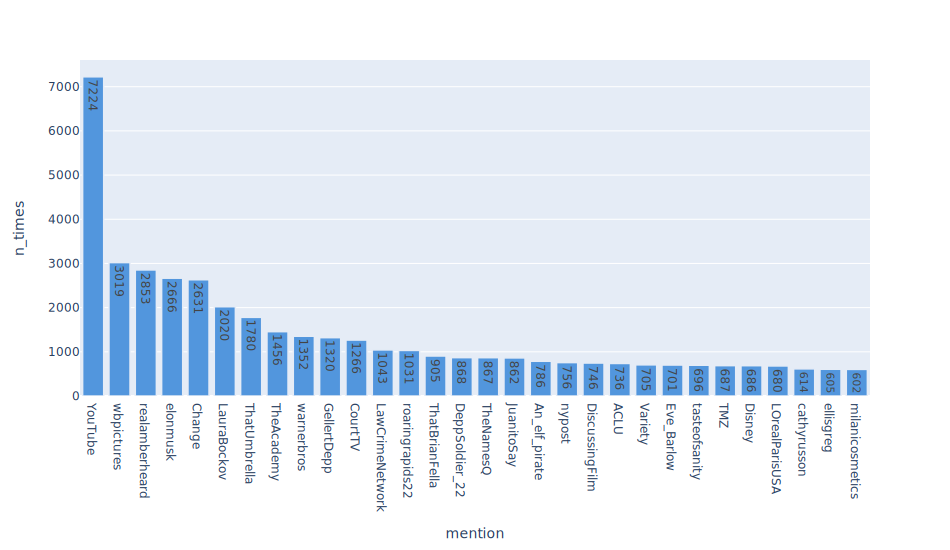

In [33]:
bar(pd.DataFrame({"mention": mentions.keys(), "n_times": mentions.values()}).head(30),
   "mention", "n_times","")

In [34]:
with open('mentions.json', 'w') as fp:
    json.dump(mentions, fp)

### Get Hashtags

In [35]:
df_2022_tweets_lite["hashtags"] = df_2022_tweets_lite.full_text.apply(
    lambda x: re.findall(
        r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9_]+)", str(x)
    ))

In [36]:
df_2022_tweets_lite["n_hashtags"] = df_2022_tweets_lite["hashtags"].apply(
    lambda x: len(x)
)

In [37]:
df_2022_tweets_lite[df_2022_tweets_lite.n_hashtags > 0]

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count,mentions,n_mentions,hashtags,n_hashtags
0,1477504983130116096,2022-01-02 05:00:13+00:00,@la77465262 @Melinda15199317 @Dior So why is #...,114979514,seano999,Sean O'Connor,2010-02-17 06:20:14+00:00,"Young guy, varied interests. Socialist. Europe...",http://pbs.twimg.com/profile_images/1442389537...,https://pbs.twimg.com/profile_banners/11497951...,NaN,27033.0,631.0,1898.0,"[la77465262, Melinda15199317, Dior]",3,[JohnnyDepp],1
5,1477496377865347072,2022-01-02 04:26:01+00:00,#BoycottWarnerBrothers #BoycottFantasticBeasts...,1186436773104238594,Jacqui83940465,Jacqui,2019-10-22 00:20:02+00:00,me,http://pbs.twimg.com/profile_images/1513249601...,NaN,NaN,5167.0,166.0,155.0,[],0,"[BoycottWarnerBrothers, BoycottFantasticBeasts...",3
7,1477494128153964544,2022-01-02 04:17:05+00:00,Excellent Johnny Depp fan art!\n#JusticeforJoh...,499815801,SBarrBrisebois,SimonBarreBrisebois,2012-02-22 14:19:59+00:00,"Librarian, writer, visual artist, https://t.co...",http://pbs.twimg.com/profile_images/1383927545...,https://pbs.twimg.com/profile_banners/49981580...,https://t.co/HYZeYss43M,242556.0,2073.0,1919.0,[],0,[JusticeforJohnnyDepp],1
8,1477494112844763141,2022-01-02 04:17:01+00:00,@justiceforjteam @LauraBockov Yes we do!\n#Jus...,106104546,Sunyasue,Ada Lavin,2010-01-18 14:26:24+00:00,Life is good.,http://pbs.twimg.com/profile_images/7605920297...,https://pbs.twimg.com/profile_banners/10610454...,NaN,39737.0,1395.0,2422.0,"[justiceforjteam, LauraBockov]",2,[JusticeForJohnnyDepp],1
9,1477492890842587144,2022-01-02 04:12:10+00:00,#JusticeForJohnnyDepp,1208864446497591300,DuTCHeSSDaNk1,SHooTeRRaiNEY,2019-12-22 21:39:07+00:00,I just want my 15 minutes of sanity,http://pbs.twimg.com/profile_images/1503373838...,https://pbs.twimg.com/profile_banners/12088644...,NaN,2895.0,64.0,391.0,[],0,[JusticeForJohnnyDepp],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573773,1515570760747827202,2022-04-17 06:00:01+00:00,AMBER HEARD AS GRETA MATTHEWS IN THE HIDDEN PA...,1507698474602700800,amberheardhour,hourly amber heard,2022-03-26 12:39:27+00:00,fan account dedicated to actor and activist am...,http://pbs.twimg.com/profile_images/1507704513...,https://pbs.twimg.com/profile_banners/15076984...,https://t.co/KZiNwb3Hru,813.0,58.0,2.0,[],0,[IStandWithAmberHeard],1
573774,1515570677943881731,2022-04-17 05:59:42+00:00,@WineDoodles legendary as #AmandaUnheardOf 's ...,305700310,aviaum,good will,2011-05-26 17:13:22+00:00,all and nothing less,http://pbs.twimg.com/profile_images/1355333220...,https://pbs.twimg.com/profile_banners/30570031...,NaN,143428.0,879.0,2314.0,[WineDoodles],1,"[AmandaUnheardOf, TruthMatters, JusticeForJohn...",5
573776,1515570219493646336,2022-04-17 05:57:52+00:00,#abusehasnogender #amberheardisanabuser #amber...,33250897,FlamenRed,FlamenRed,2009-04-19 17:10:14+00:00,Addicted to reality TV.,http://pbs.twimg.com/profile_images/2516900608...,https://pbs.twimg.com/profile_banners/33250897...,NaN,18357.0,99.0,639.0,[],0,"[abusehasnogender, amberheardisanabuser, amber...",5
573780,1515569612686970883,2022-04-17 05:55:28+00:00,#JusticeForJohnnyDepp \n#JusticeForJohnnyDeppV...,3303069384,CJMoss007,Cindy Moss🌱Ⓥ,2015-08-01 07:03:17+00:00,#JusticeForJohnnyDepp,http://pbs.twimg.com/profile_images/1502775880...,NaN,NaN,6225.0,144.0,647.0,[],0,"[JusticeForJohnnyDepp, JusticeForJohnnyDeppVir...",2


In [38]:
hashtags = [
    x
    for list_ in df_2022_tweets_lite[df_2022_tweets_lite.n_hashtags > 0].hashtags.values
    for x in list_
]

In [39]:
hashtags = {k: v for k, v in sorted(Counter(hashtags).items(), key=lambda item: item[1], reverse =True)}

In [40]:
hashtags

{'JusticeForJohnnyDepp': 219893,
 'JohnnyDepp': 39507,
 'AmberHeardIsALiar': 31183,
 'AmberHeardIsAnAbuser': 29365,
 'JusticeForJohnnyDeppVirginia2022': 24545,
 'AmberHeard': 13853,
 'JohnnyDeppIsInnocent': 13403,
 'JusticeforJohnnyDepp': 9319,
 'IStandWithJohnnyDepp': 8692,
 'JohnnyDeppVsAmberHeard': 8680,
 'AmberTurd': 8246,
 'justiceforjohnnydepp': 6537,
 'JohnnyDeppDeservesJustice': 5995,
 'JusticeForJohhnyDepp': 5220,
 'Minamata': 3786,
 'AquamanAndTheLostKingdom': 3213,
 'MenToo': 3194,
 'MePoo': 3163,
 'JusticeForJohnnyDeep': 2714,
 'johnnydepp': 2599,
 'AbuseHasNoGender': 2403,
 'OscarsFanFavorite': 2212,
 'Sweepstakes': 2006,
 'DeppVsHeard': 2006,
 'JohnnyDepptrial': 1752,
 'IStandWithAmberHeard': 1609,
 'JusticeForJohnnyDeppVA2022': 1579,
 'DeppWarriorsGroupHug': 1554,
 'AmberHeardDeservesPrison': 1422,
 'NeverFearTruth': 1376,
 'amberheard': 1319,
 'DeppHeardTrial': 1298,
 'JusticeForJohnny': 1253,
 'AmberHeardIsADangerToOthers': 1093,
 'MeToo': 997,
 'DeppvHeard': 973,
 'Tr

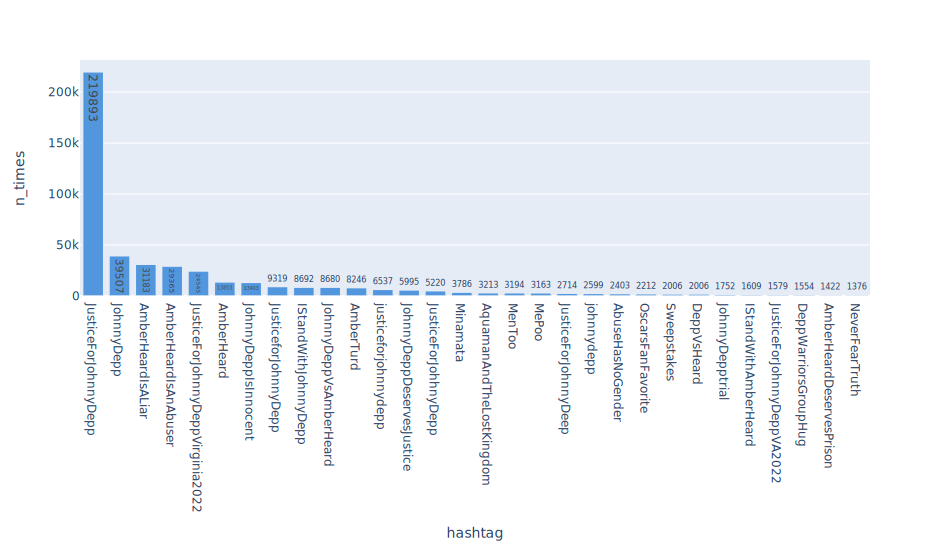

In [41]:
bar(pd.DataFrame({"hashtag": hashtags.keys(), "n_times": hashtags.values()}).head(30),
   "hashtag", "n_times","")

In [42]:
with open('hashtags.json', 'w') as fp:
    json.dump(hashtags, fp)

In [43]:
df_2022_tweets_lite

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count,mentions,n_mentions,hashtags,n_hashtags
0,1477504983130116096,2022-01-02 05:00:13+00:00,@la77465262 @Melinda15199317 @Dior So why is #...,114979514,seano999,Sean O'Connor,2010-02-17 06:20:14+00:00,"Young guy, varied interests. Socialist. Europe...",http://pbs.twimg.com/profile_images/1442389537...,https://pbs.twimg.com/profile_banners/11497951...,NaN,27033.0,631.0,1898.0,"[la77465262, Melinda15199317, Dior]",3,[JohnnyDepp],1
1,1477503751716065280,2022-01-02 04:55:19+00:00,Only thing I want them to leave alone is the f...,1426227152589139969,WonderWilson18,❤️‍🔥 Wilson the Opp Slayer 🔪,2021-08-13 17:00:36+00:00,"So fuck your rules man 🖕🏽Your Favorite K2, Avr...",http://pbs.twimg.com/profile_images/1515742990...,https://pbs.twimg.com/profile_banners/14262271...,https://t.co/dVvgQNht1k,27853.0,869.0,1025.0,[],0,[],0
2,1477499814719983617,2022-01-02 04:39:41+00:00,@soldierboy43001 @ZakReckless Yeah but Snyder ...,1427358993803005956,StevenJCurry,Steven Curry,2021-08-16 19:58:03+00:00,NaN,http://pbs.twimg.com/profile_images/1429534379...,https://pbs.twimg.com/profile_banners/14273589...,NaN,199.0,15.0,139.0,"[soldierboy43001, ZakReckless]",2,[],0
3,1477497740498292738,2022-01-02 04:31:26+00:00,@IIMissMax @bg98021 @GerberKawasaki You forgot...,1354476984617885703,Vincent72516869,Vincent 1,2021-01-27 17:11:08+00:00,🌮🍕🍔🥪🍳🍤🍜🍛🥟🍰💵,http://pbs.twimg.com/profile_images/1354614785...,NaN,NaN,2313.0,26.0,128.0,"[IIMissMax, bg98021, GerberKawasaki]",3,[],0
4,1477496477484212225,2022-01-02 04:26:25+00:00,I never seen Aquaman nor will I because Amber ...,1076943230657269761,YoonJaysSimp,𝐇𝐘𝐃𝐄,2018-12-23 20:50:49+00:00,𝐁𝐋 𝐂𝐎𝐍𝐓𝐄𝐍𝐓 • 𝘈𝘯𝘪𝘮𝘦 • 𝘔𝘢𝘯𝘨𝘢 • 𝘔𝘢𝘯𝘩𝘸𝘢 • 𝘕𝘚𝘍𝘞 • 𝘚...,http://pbs.twimg.com/profile_images/1516751870...,https://pbs.twimg.com/profile_banners/10769432...,https://t.co/XkBVR5FDCS,5423.0,120.0,141.0,[],0,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573778,1515569901158600704,2022-04-17 05:56:37+00:00,Gender card pulled out. They are now spinning ...,27013539,GhelSandra,ayyy nakoooo,2009-03-27 14:25:52+00:00,🐯 tomasino est 2000something art educator.pers...,http://pbs.twimg.com/profile_images/1402120521...,https://pbs.twimg.com/profile_banners/27013539...,https://t.co/KRDaAomcsU,30280.0,160.0,201.0,[],0,[],0
573779,1515569890391961601,2022-04-17 05:56:34+00:00,Amber heard is a libra moon. Ive known a few l...,1418420215755517952,lilithrising_,Jeli Bean,2021-07-23 03:59:18+00:00,☀️♌ 🌚♑ ♄,http://pbs.twimg.com/profile_images/1516523367...,https://pbs.twimg.com/profile_banners/14184202...,NaN,7863.0,59.0,154.0,[],0,[],0
573780,1515569612686970883,2022-04-17 05:55:28+00:00,#JusticeForJohnnyDepp \n#JusticeForJohnnyDeppV...,3303069384,CJMoss007,Cindy Moss🌱Ⓥ,2015-08-01 07:03:17+00:00,#JusticeForJohnnyDepp,http://pbs.twimg.com/profile_images/1502775880...,NaN,NaN,6225.0,144.0,647.0,[],0,"[JusticeForJohnnyDepp, JusticeForJohnnyDeppVir...",2
573781,1515569604818575368,2022-04-17 05:55:26+00:00,"Amber Heard is dating Eve Fartlow, Chelsea Man...",1319471183016939520,Jankem69420,Jalopy Galopy,2020-10-23 02:50:36+00:00,''Virtue-signalling geopolitically ignorant ca...,http://pbs.twimg.com/profile_images/1427306627...,https://pbs.twimg.com/profile_banners/13194711...,https://t.co/C6Pn7cxcss,9171.0,585.0,3214.0,[],0,[],0


In [44]:
sum(df_2022_tweets_lite.n_hashtags > 0)

283131

In [45]:
print(
    f"283131 from {df_2022_tweets_lite.shape[0]}, {round(283131  / df_2022_tweets_lite.shape[0], 2)}% of tweets"
)

283131 from 573780, 0.49% of tweets


In [46]:
df_2022_tweets_lite

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count,mentions,n_mentions,hashtags,n_hashtags
0,1477504983130116096,2022-01-02 05:00:13+00:00,@la77465262 @Melinda15199317 @Dior So why is #...,114979514,seano999,Sean O'Connor,2010-02-17 06:20:14+00:00,"Young guy, varied interests. Socialist. Europe...",http://pbs.twimg.com/profile_images/1442389537...,https://pbs.twimg.com/profile_banners/11497951...,NaN,27033.0,631.0,1898.0,"[la77465262, Melinda15199317, Dior]",3,[JohnnyDepp],1
1,1477503751716065280,2022-01-02 04:55:19+00:00,Only thing I want them to leave alone is the f...,1426227152589139969,WonderWilson18,❤️‍🔥 Wilson the Opp Slayer 🔪,2021-08-13 17:00:36+00:00,"So fuck your rules man 🖕🏽Your Favorite K2, Avr...",http://pbs.twimg.com/profile_images/1515742990...,https://pbs.twimg.com/profile_banners/14262271...,https://t.co/dVvgQNht1k,27853.0,869.0,1025.0,[],0,[],0
2,1477499814719983617,2022-01-02 04:39:41+00:00,@soldierboy43001 @ZakReckless Yeah but Snyder ...,1427358993803005956,StevenJCurry,Steven Curry,2021-08-16 19:58:03+00:00,NaN,http://pbs.twimg.com/profile_images/1429534379...,https://pbs.twimg.com/profile_banners/14273589...,NaN,199.0,15.0,139.0,"[soldierboy43001, ZakReckless]",2,[],0
3,1477497740498292738,2022-01-02 04:31:26+00:00,@IIMissMax @bg98021 @GerberKawasaki You forgot...,1354476984617885703,Vincent72516869,Vincent 1,2021-01-27 17:11:08+00:00,🌮🍕🍔🥪🍳🍤🍜🍛🥟🍰💵,http://pbs.twimg.com/profile_images/1354614785...,NaN,NaN,2313.0,26.0,128.0,"[IIMissMax, bg98021, GerberKawasaki]",3,[],0
4,1477496477484212225,2022-01-02 04:26:25+00:00,I never seen Aquaman nor will I because Amber ...,1076943230657269761,YoonJaysSimp,𝐇𝐘𝐃𝐄,2018-12-23 20:50:49+00:00,𝐁𝐋 𝐂𝐎𝐍𝐓𝐄𝐍𝐓 • 𝘈𝘯𝘪𝘮𝘦 • 𝘔𝘢𝘯𝘨𝘢 • 𝘔𝘢𝘯𝘩𝘸𝘢 • 𝘕𝘚𝘍𝘞 • 𝘚...,http://pbs.twimg.com/profile_images/1516751870...,https://pbs.twimg.com/profile_banners/10769432...,https://t.co/XkBVR5FDCS,5423.0,120.0,141.0,[],0,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573778,1515569901158600704,2022-04-17 05:56:37+00:00,Gender card pulled out. They are now spinning ...,27013539,GhelSandra,ayyy nakoooo,2009-03-27 14:25:52+00:00,🐯 tomasino est 2000something art educator.pers...,http://pbs.twimg.com/profile_images/1402120521...,https://pbs.twimg.com/profile_banners/27013539...,https://t.co/KRDaAomcsU,30280.0,160.0,201.0,[],0,[],0
573779,1515569890391961601,2022-04-17 05:56:34+00:00,Amber heard is a libra moon. Ive known a few l...,1418420215755517952,lilithrising_,Jeli Bean,2021-07-23 03:59:18+00:00,☀️♌ 🌚♑ ♄,http://pbs.twimg.com/profile_images/1516523367...,https://pbs.twimg.com/profile_banners/14184202...,NaN,7863.0,59.0,154.0,[],0,[],0
573780,1515569612686970883,2022-04-17 05:55:28+00:00,#JusticeForJohnnyDepp \n#JusticeForJohnnyDeppV...,3303069384,CJMoss007,Cindy Moss🌱Ⓥ,2015-08-01 07:03:17+00:00,#JusticeForJohnnyDepp,http://pbs.twimg.com/profile_images/1502775880...,NaN,NaN,6225.0,144.0,647.0,[],0,"[JusticeForJohnnyDepp, JusticeForJohnnyDeppVir...",2
573781,1515569604818575368,2022-04-17 05:55:26+00:00,"Amber Heard is dating Eve Fartlow, Chelsea Man...",1319471183016939520,Jankem69420,Jalopy Galopy,2020-10-23 02:50:36+00:00,''Virtue-signalling geopolitically ignorant ca...,http://pbs.twimg.com/profile_images/1427306627...,https://pbs.twimg.com/profile_banners/13194711...,https://t.co/C6Pn7cxcss,9171.0,585.0,3214.0,[],0,[],0


### Normalization

- Remove Emojis.
- Convert all text to lower case.
- remove hashtgs and mentions

### Remove EMOJIS

In [47]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               "❤️"
                               "🥰"
            u"\U0001F600-\U0001F64F" 
            u"\U0001F300-\U0001F5FF"  
            u"\U0001F680-\U0001F6FF"  
            u"\U0001F1E0-\U0001F1FF"  
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [55]:
df_2022_tweets_lite.full_text[5]

'#BoycottWarnerBrothers #BoycottFantasticBeasts3 #JusticeForJohnnyDepp ✊🏽🌹'

In [53]:
df_2022_tweets_lite.full_text.apply(lambda x: remove_emojis(str(x)))[5]

'#BoycottWarnerBrothers #BoycottFantasticBeasts3 #JusticeForJohnnyDepp ✊'

In [56]:
from cleantext import clean
clean(df_2022_tweets_lite.full_text[5], no_emoji=True)

'#boycottwarnerbrothers #boycottfantasticbeasts3 #justiceforjohnnydepp'

In [57]:
df_2022_tweets_lite["clean_text"] = df_2022_tweets_lite.full_text.apply(lambda x: clean(str(x), no_emoji=True))

In [59]:
df_2022_tweets_lite["clean_text"][5]

'#boycottwarnerbrothers #boycottfantasticbeasts3 #justiceforjohnnydepp'

In [60]:
df_2022_tweets_lite["clean_text"] = df_2022_tweets_lite["clean_text"].str.lowerer()

In [61]:
df_2022_tweets_lite["clean_text"]

0         @la77465262 @melinda15199317 @dior so why is #...
1         only thing i want them to leave alone is the f...
2         @soldierboy43001 @zakreckless yeah but snyder ...
3         @iimissmax @bg98021 @gerberkawasaki you forgot...
4         i never seen aquaman nor will i because amber ...
                                ...                        
573778    gender card pulled out. they are now spinning ...
573779    amber heard is a libra moon. ive known a few l...
573780    #justiceforjohnnydepp\n#justiceforjohnnydeppvi...
573781    amber heard is dating eve fartlow, chelsea man...
573782    #johnnydepp is and always will be a gentleman....
Name: clean_text, Length: 573780, dtype: object

In [65]:
re.sub(
    r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9_]+)",
    "",
    re.sub(
        r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9_]+)",
        "",
        df_2022_tweets_lite["clean_text"][0],
        count=0,
        flags=0,
    ).strip(),
).strip()

"so why is  only bringing a civil case against amber heard? because he knows his evidence won't stand up in criminal court! johnny's just wasting his money! his reputation is shot. his own fault for bringing the case in uk. even the stans say it's a waste of time! https://t.co/jcusekvn0s"

In [66]:
df_2022_tweets_lite["clean_text"] = df_2022_tweets_lite["clean_text"].apply(
    lambda x: re.sub(
        r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9_]+)",
        "",
        re.sub(
            r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9_]+)",
            "",
            str(x),
            count=0,
            flags=0,
        ).strip(),
    ).strip()
)

In [69]:
df_2022_tweets_lite["clean_text"]

0         so why is  only bringing a civil case against ...
1         only thing i want them to leave alone is the f...
2         yeah but snyder isn't involved in the flash so...
3         you forgot he hook up with amber heard . i am ...
4         i never seen aquaman nor will i because amber ...
                                ...                        
573778    gender card pulled out. they are now spinning ...
573779    amber heard is a libra moon. ive known a few l...
573780                                                     
573781    amber heard is dating eve fartlow, chelsea man...
573782    is and always will be a gentleman. yes, he wro...
Name: clean_text, Length: 573780, dtype: object

### Tokenization

- text into a list of unique words.
- remove stop words.


In [70]:
all_stop_words = []
for lang in stopwords.fileids():
    all_stop_words.append(stopwords.words(lang))
all_stop_words = [item for sublist in all_stop_words for item in sublist]

In [71]:
all_stop_words

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [87]:
def tokenize(text: str) -> list:
    if str(text) == "nan":
        return None
    else:
        return [i for i in [i for i in word_tokenize(text) if i not in all_stop_words] if i.isalnum()]    

In [74]:
df_2022_tweets_lite["clean_text"] = np.where(df_2022_tweets_lite.clean_text == '', np.nan, df_2022_tweets_lite.clean_text)

In [75]:
df_2022_tweets_lite["clean_text"]

0         so why is  only bringing a civil case against ...
1         only thing i want them to leave alone is the f...
2         yeah but snyder isn't involved in the flash so...
3         you forgot he hook up with amber heard . i am ...
4         i never seen aquaman nor will i because amber ...
                                ...                        
573778    gender card pulled out. they are now spinning ...
573779    amber heard is a libra moon. ive known a few l...
573780                                                  NaN
573781    amber heard is dating eve fartlow, chelsea man...
573782    is and always will be a gentleman. yes, he wro...
Name: clean_text, Length: 573780, dtype: object

In [98]:
import time
start_time = time.time()
df_2022_tweets_lite["tokens"] = df_2022_tweets_lite.clean_text.apply(lambda x: tokenize(str(x)))
print("--- %s seconds ---" % (time.time() - start_time))

--- 1450.606535434723 seconds ---


In [99]:
df_2022_tweets_lite["tokens"]

0         [bringing, civil, case, amber, heard, knows, e...
1         [thing, leave, alone, first, wonder, woman, mo...
2         [yeah, snyder, involved, flash, would, amber, ...
3         [forgot, hook, amber, heard, sure, find, someo...
4                      [never, seen, aquaman, amber, heard]
                                ...                        
573778    [gender, card, pulled, spinning, make, woman, ...
573779    [amber, heard, libra, moon, ive, known, libra,...
573780                                                 None
573781    [amber, heard, dating, eve, fartlow, chelsea, ...
573782    [always, gentleman, yes, wrote, nice, text, me...
Name: tokens, Length: 573780, dtype: object

In [104]:
def remove_stopwords(tokens):
    if tokens is None:
        return None
    else:
        return [i for i in tokens if i not in all_stop_words]

In [107]:
df_2022_tweets_lite["tokens"] = df_2022_tweets_lite["tokens"].apply(lambda x: remove_stopwords(x))

In [111]:
df_2022_tweets_lite = df_2022_tweets_lite.drop(
    columns=[
        "full_text",
        "user.name",
        "user.profile_image_url",
        "user.profile_banner_url",
        "user.url",
        "user.url",
        "user.statuses_count",
        "user.followers_count",
        "user.friends_count",
    ]
)

### User Description

In [113]:
df_2022_tweets_lite["user_description"] = df_2022_tweets_lite["user.description"].apply(lambda x: clean(str(x), no_emoji=True))

In [115]:
df_2022_tweets_lite["user_description"].value_counts()

nan                                                                                                                                             113415
sometimes we miss happiness by looking too far for things nearby.                                                                                24965
laugh as much as you breathe and love as long as you live. today is a gift. just have fun. -johnny depp // depphead. sa survivor. not a bot!      7857
                                                                                                                                                  5667
#justiceforjohnnydepp                                                                                                                             3008
                                                                                                                                                 ...  
all-around weirdo for @singularfortean who loves ttrpgs and fantasy/sci-fi/horror media. i als

In [116]:
df_2022_tweets_lite.head(1)

,id_str,created_at,user.id_str,user.screen_name,user.created_at,user.description,mentions,n_mentions,hashtags,n_hashtags,clean_text,tokens,user_description
0,1477504983130116096,2022-01-02 05:00:13+00:00,114979514,seano999,2010-02-17 06:20:14+00:00,"Young guy, varied interests. Socialist. Europe...","[la77465262, Melinda15199317, Dior]",3,[JohnnyDepp],1,so why is only bringing a civil case against ...,"[bringing, civil, case, amber, heard, knows, e...","young guy, varied interests. socialist. europe..."


In [117]:
df_2022_tweets_lite["user.screen_name"].value_counts()

AnnLoCapRip       24965
DeppSoldier_22     7857
la77465262         2993
KTN12201           2445
nibs56139211       1394
                  ...  
nm_angelfaery         1
earlysunsetx          1
CalledManiac          1
liluzihurt00          1
Jankem69420           1
Name: user.screen_name, Length: 182541, dtype: int64

In [121]:
df_2022_tweets_lite[df_2022_tweets_lite["user_description"] == "#justiceforjohnnydepp"]["user.screen_name"].unique()

array(['Catmoonstar1', 'Alejandraadepp', 'AliceZ86866073', 'GenevieDEPP',
       'CJMoss007', 'Truthse10335075', 'rosaoch89814746',
       'MOlsen15996329', 'Susan94118760', 'LenasJarofdirt', 'campbedream',
       'Noel16630972', 'AidaRusu', 'Nicola78918588', 'simbasstitch',
       'FeelinWitchy', 'callmesevda1', 'agirlofthenorth', 'steviecmfts',
       'khloe50221238', 'MrStenChYStEnCh', 'ArmacostBrennan',
       'Alice1502693784', 'johnnydeppmj', 'SnezhanaYanush1',
       'justice4_jd', 'atloverd', 'SELI_TALE', 'j4lkai', 'FromLustToDust',
       'stylesjdepp', 'MercyFirst0', 'Paris2804', 'CatrionaOConn11',
       'Shazzie1979', 'urgirlangelika', 'alghaSii', 'urbosasfury2021',
       'agnesmaccallum', 'DeppUnHeard', 'bonitadepphead', 'johncdepp_',
       'nicoleg917', 'HarryBlair14', 'JohnnysGirl86', 'kiks_211',
       'Hastala10106913', 'Deppist03', 'levislov', 'LiannetMorales',
       'k87765', 'Sammyjoabbie', 'KINTARA69', 'PocketCryptid13',
       'ProdLUDD', 'OkMichu', 'larausx_',

In [122]:
with open("johnnydepp_in_description.txt", "w") as output:
    output.write(
        str(
            list(
                df_2022_tweets_lite[
                    df_2022_tweets_lite["user_description"] == "#justiceforjohnnydepp"
                ]["user.screen_name"].unique()
            )
        )
    )

In [124]:
df_2022_tweets_lite.to_csv(data_path+"2022_prepared_tweets.csv", index=False)